In [171]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import sys
lya = 1215.67

In [172]:
linear_basedir = '/Users/jfarr/Projects/test_data/process_output_G_hZsmooth_4096_32_sr2.0_bm1_biasG18_picos_nside16_N1000_largecell'
pixel = 1
pixel100 = pixel//100
iskewer = 4

In [173]:
thermal_identifiers = ['placeJ','placeerf']
thermal_basedirs = []
for tid in thermal_identifiers:
    thermal_basedirs += [linear_basedir+'_thermal_{}'.format(tid)]

noRSD THING_ID 268
linear RSD THING_ID 268
thermal placeJ THING_ID 268
thermal placeerf THING_ID 268


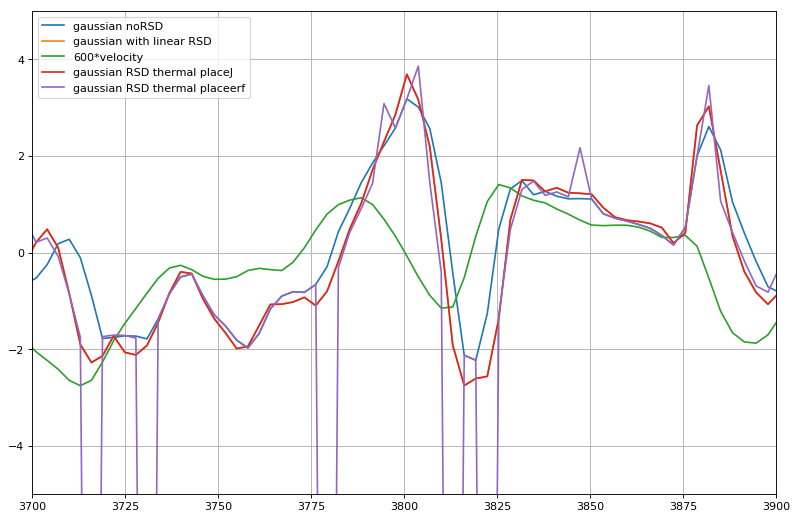

In [178]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

h = fits.open(linear_basedir+'/{}/{}/picca-gaussian-noRSD-16-{}.fits'.format(pixel100,pixel,pixel))
noRSD_gaussian_skewer = h[0].data[:,iskewer]
lambdas = 10**h[2].data
plt.plot(lambdas,noRSD_gaussian_skewer,label='gaussian noRSD')
THING_ID = h[3].data['THING_ID'][iskewer]
print('noRSD THING_ID', THING_ID)
h.close()

h = fits.open(linear_basedir+'/{}/{}/picca-gaussian-16-{}.fits'.format(pixel100,pixel,pixel))
linear_gaussian_skewer = h[0].data[:,iskewer]
lambdas = 10**h[2].data
plt.plot(lambdas,linear_gaussian_skewer,label='gaussian with linear RSD')
THING_ID = h[3].data['THING_ID'][iskewer]
print('linear RSD THING_ID',THING_ID)
h.close()

h = fits.open(linear_basedir+'/{}/{}/gaussian-colore-16-{}.fits'.format(pixel100,pixel,pixel))
velocity_skewer = h[3].data[np.searchsorted(h[1].data['MOCKID'],THING_ID),:]
colore_lambdas = lya*(1+h[4].data['Z'])
plt.plot(colore_lambdas,600*velocity_skewer,label='600*velocity')
h.close()

for i,thermal_basedir in enumerate(thermal_basedirs):
    h = fits.open(thermal_basedir+'/{}/{}/picca-gaussian-16-{}.fits'.format(pixel100,pixel,pixel))
    gaussian_skewer = h[0].data[:,iskewer]
    lambdas = 10**h[2].data
    plt.plot(lambdas,gaussian_skewer,label='gaussian RSD thermal {}'.format(thermal_identifiers[i]))
    print('thermal {}'.format(thermal_identifiers[i]),'THING_ID',h[3].data['THING_ID'][iskewer])
    h.close()

centre = 3800.
rad = 100.
plt.xlim(centre-rad,centre+rad)  
plt.ylim(-5,5)
plt.grid()
plt.legend()
plt.show()

thermal placeJ THING_ID 268
thermal placeerf THING_ID 268


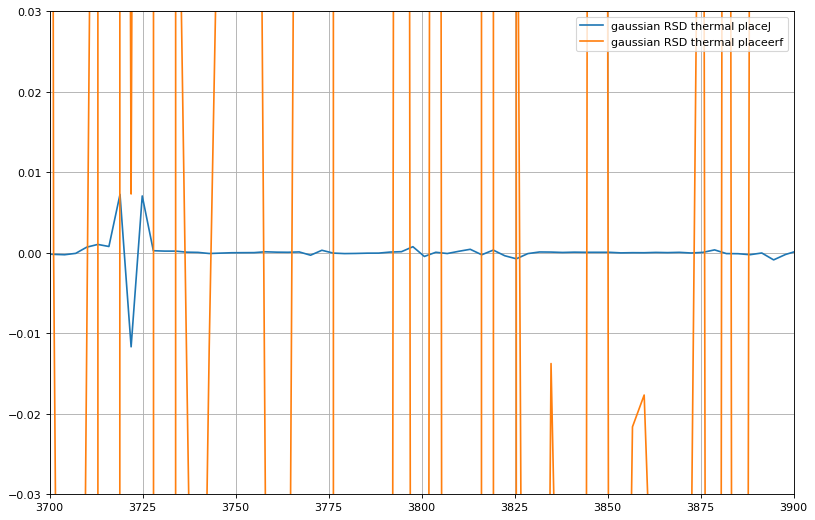

In [179]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

for i,thermal_basedir in enumerate(thermal_basedirs):
    h = fits.open(thermal_basedir+'/{}/{}/picca-gaussian-16-{}.fits'.format(pixel100,pixel,pixel))
    gaussian_skewer = h[0].data[:,iskewer]
    lambdas = 10**h[2].data
    plt.plot(lambdas,gaussian_skewer-linear_gaussian_skewer,label='gaussian RSD thermal {}'.format(thermal_identifiers[i]))
    print('thermal {}'.format(thermal_identifiers[i]),'THING_ID',h[3].data['THING_ID'][iskewer])
    h.close()

centre = 3800.
rad = 100.
plt.xlim(centre-rad,centre+rad)  
plt.ylim(-0.03,0.03)
plt.grid()
plt.legend()
plt.show()

Below includes the extra small scale power (these plots are not useful at the moment - extra noise is added randomly and so each skewer with ssp is different, even if the MOCKID is the same)

In [180]:
linear_basedir = '/Users/jfarr/Projects/test_data/process_output_G_hZsmooth_4096_32_sr2.0_bm1_biasG18_picos_nside16_N1000'
pixel = 1
pixel100 = pixel//100
iskewer = 4

In [202]:
compare_broadening = ['_thermal_placeJ','_thermal_placeJ_05xsig','_thermal_placeJ_2xsig']
compare_weights = ['_thermal_placeJ','_thermal_placeerf']
check_flag = ['_test_thermal','_test_linear']

thermal_identifiers = compare_broadening
thermal_basedirs = []
for tid in thermal_identifiers:
    thermal_basedirs += [linear_basedir+tid]

In [ ]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

h = fits.open(linear_basedir+'/{}/{}/picca-gaussian-noRSD-16-{}.fits'.format(pixel100,pixel,pixel))
noRSD_gaussian_skewer = h[0].data[:,iskewer]
lambdas = 10**h[2].data
#plt.plot(lambdas,noRSD_gaussian_skewer,label='gaussian noRSD')
THING_ID = h[3].data['THING_ID'][iskewer]
print('noRSD THING_ID', THING_ID)
h.close()

h = fits.open(linear_basedir+'/{}/{}/picca-gaussian-16-{}.fits'.format(pixel100,pixel,pixel))
linear_gaussian_skewer = h[0].data[:,iskewer]
lambdas = 10**h[2].data
plt.plot(lambdas,linear_gaussian_skewer,label='gaussian with linear RSD')
THING_ID = h[3].data['THING_ID'][iskewer]
print('linear RSD THING_ID',THING_ID)
h.close()

h = fits.open(linear_basedir+'/{}/{}/gaussian-colore-16-{}.fits'.format(pixel100,pixel,pixel))
velocity_skewer = h[3].data[np.searchsorted(h[1].data['MOCKID'],THING_ID),:]
colore_lambdas = lya*(1+h[4].data['Z'])
plt.plot(colore_lambdas,600*velocity_skewer,label='600*velocity')
h.close()

for i,thermal_basedir in enumerate(thermal_basedirs):
    h = fits.open(thermal_basedir+'/{}/{}/picca-gaussian-16-{}.fits'.format(pixel100,pixel,pixel))
    gaussian_skewer = h[0].data[:,iskewer]
    lambdas = 10**h[2].data
    plt.plot(lambdas,gaussian_skewer,label='gaussian RSD thermal {}'.format(thermal_identifiers[i]))
    print('thermal {}'.format(thermal_identifiers[i]),'THING_ID',h[3].data['THING_ID'][iskewer])
    h.close()

centre = 3800.
rad = 10.
plt.xlim(centre-rad,centre+rad)  
plt.ylim(-15,15)
plt.grid()
plt.legend()
plt.show()

noRSD THING_ID 268
linear RSD THING_ID 268
thermal placeJ THING_ID 268
thermal placeerf THING_ID 268


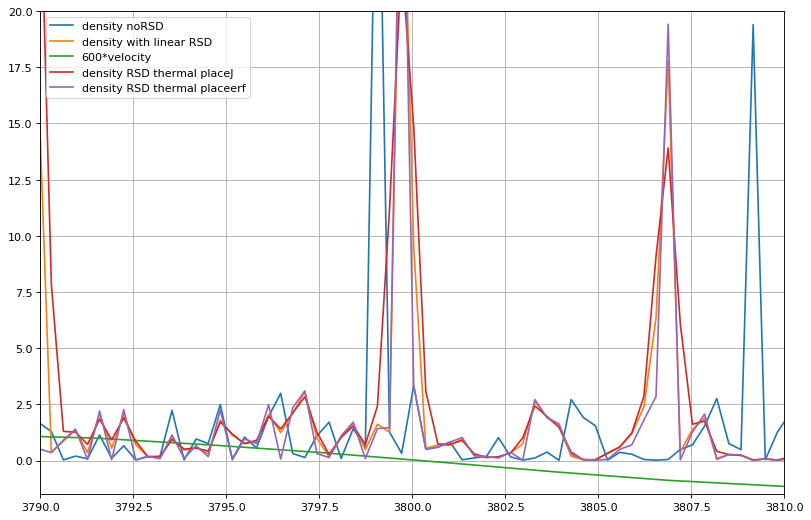

In [183]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

h = fits.open(linear_basedir+'/{}/{}/picca-density-noRSD-16-{}.fits'.format(pixel100,pixel,pixel))
noRSD_density_skewer = 1 + h[0].data[:,iskewer]
lambdas = 10**h[2].data
plt.plot(lambdas,noRSD_density_skewer,label='density noRSD')
THING_ID = h[3].data['THING_ID'][iskewer]
print('noRSD THING_ID', THING_ID)
h.close()

h = fits.open(linear_basedir+'/{}/{}/picca-density-16-{}.fits'.format(pixel100,pixel,pixel))
linear_density_skewer = 1 + h[0].data[:,iskewer]
lambdas = 10**h[2].data
plt.plot(lambdas,linear_density_skewer,label='density with linear RSD')
THING_ID = h[3].data['THING_ID'][iskewer]
print('linear RSD THING_ID',THING_ID)
h.close()

h = fits.open(linear_basedir+'/{}/{}/physical-colore-16-{}.fits'.format(pixel100,pixel,pixel))
velocity_skewer = h[3].data[np.searchsorted(h[1].data['MOCKID'],THING_ID),:]
colore_lambdas = lya*(1+h[4].data['Z'])
plt.plot(colore_lambdas,600*velocity_skewer,label='600*velocity')
h.close()

for i,thermal_basedir in enumerate(thermal_basedirs):
    h = fits.open(thermal_basedir+'/{}/{}/picca-density-16-{}.fits'.format(pixel100,pixel,pixel))
    density_skewer = 1 + h[0].data[:,iskewer]
    lambdas = 10**h[2].data
    plt.plot(lambdas,density_skewer,label='density RSD thermal {}'.format(thermal_identifiers[i]))
    print('thermal {}'.format(thermal_identifiers[i]),'THING_ID',h[3].data['THING_ID'][iskewer])
    h.close()

centre = 3800.
rad = 10.
plt.xlim(centre-rad,centre+rad)  
plt.ylim(-1.5,20)
plt.grid()
plt.legend()
plt.show()

In [184]:
print(np.trapz(1+density_skewer,lambdas))
print(np.trapz(1+noRSD_density_skewer,lambdas))

4154.87720938
4185.9442877
